<h2 align='center'> Feature Enginnering and Model Building </h1>
<p align="center">
<img src ="https://thumbs.dreamstime.com/b/wooden-seesaw-representing-imbalance-risk-loan-isolated-over-black-background-wooden-seesaw-representing-imbalance-223802792.jpg"/>
</p>

#### 1. Importing necessary libraries

In [1326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format  

In [1327]:
file = "/content/drive/MyDrive/Colab Notebooks/projects/Loan default prediction/Loan Flag edit.csv"
data = pd.read_csv(file)

#### Even though we have a preprocessed file we will again do the process again step by step in the feature enginnering part.

In [1328]:
df = data.copy()

In [1329]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,"? 9,03,834.00",23,3,single,rented,No,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,"? 75,74,516.00",400,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,"? 59,91,815.00",56,24,married,rented,No,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,"? 62,56,451.00",41,12,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,"? 57,68,871.00",47,21,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [1330]:
df.shape

(252000, 13)

In [1331]:
df.columns

Index(['Id', ' Income ', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

- let us rename the columns with proper words

In [1332]:
df.rename(columns = {' Income ':'Income',
                       'Married/Single':'Marital_status',
                       'CURRENT_JOB_YRS':'current_job_years',
                       'CURRENT_HOUSE_YRS':'current_house_years'},inplace=True)

In [1333]:
df.columns = df.columns.str.lower()

- let us remove the special characters in income and convert it into an integer

In [1334]:
df['income'] = df['income'].str[2:]
df['income'] = df['income'].apply(lambda v: v.replace(',',''))
df['income'] = df['income'].str.split('.').str[0]
df['income'] = df['income'].astype(int)

- let us drop the ID feature since it wont be helpful for our analysis

In [1335]:
df.drop('id',axis=1,inplace=True)

### 2.missing values

In [1336]:
print("we have ",df.isnull().sum().sum(),"missing values")

we have  0 missing values


#### 3.Numerical variables

In [1337]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != "O"]
numerical_features

['income',
 'age',
 'experience',
 'current_job_years',
 'current_house_years',
 'risk_flag']

#### - Discrete variables

In [1338]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<20]
discrete_features

['current_job_years', 'current_house_years', 'risk_flag']

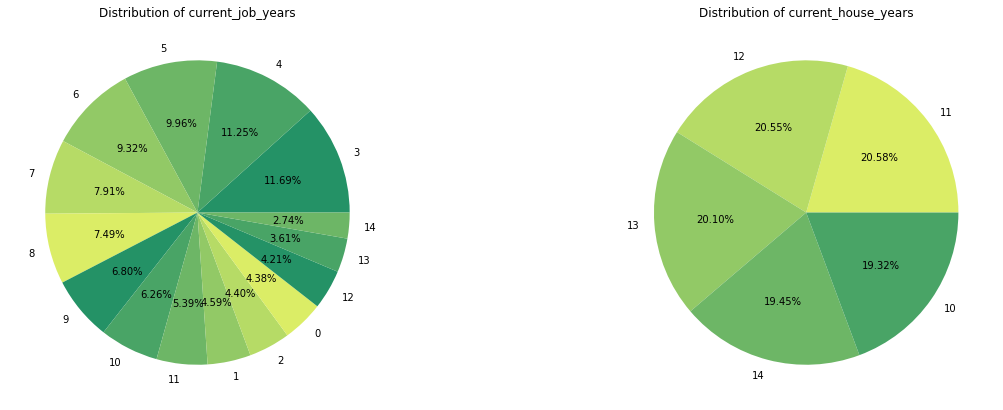

In [1339]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.pie(df['current_job_years'].value_counts(), 
          labels=df['current_job_years'].value_counts().index, 
          colors=sns.color_palette('summer'), 
          autopct='%.2f%%')
plt.title('Distribution of current_job_years')

plt.subplot(1,2,2)
plt.pie(df['current_house_years'].value_counts(), 
          labels=df['current_house_years'].value_counts().index, 
          colors=sns.color_palette('summer_r'), 
          autopct='%.2f%%')
plt.title('Distribution of current_house_years');

- since there is not much we need to change in discrete variables we will move on to continuos variables

#### - continuos variables

In [1340]:
continuos_features = [feature for feature in numerical_features if len(df[feature].unique())>20]
continuos_features

['income', 'age', 'experience']

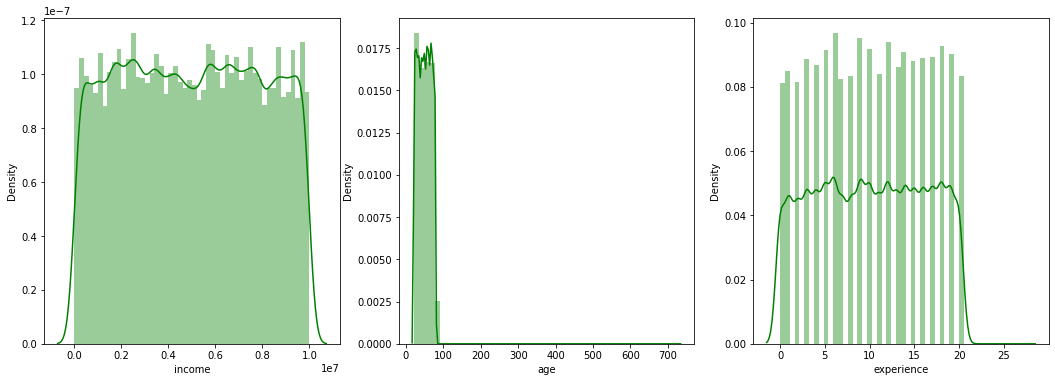

In [1341]:
fig,ax = plt.subplots(1, 3, figsize=(18, 6))
for variable,subplot in zip(continuos_features,ax.flatten()):
  sns.distplot(df[variable],ax=subplot,color='green')

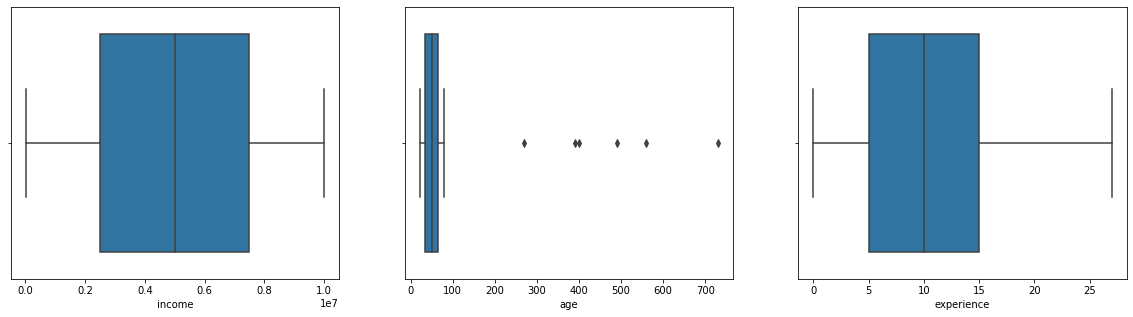

In [1342]:
fig,ax = plt.subplots(1, 3, figsize=(20, 5))
for variable,subplot in zip(continuos_features,ax.flatten()):
  sns.boxplot(df[variable],ax=subplot)

#### - Outlier Removal

- the maximum plausible age in our age feature is 80 so we will remove any age after that
- we could transform the experience into normal,but since feature scaling will bring the data to equal range we will let it be

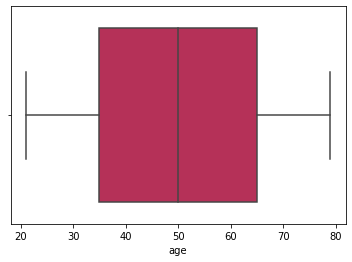

In [1343]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(df['age'])
for i in df['age']:
    if i > Upper_tail or i < Lower_tail:
            df['age'] = df['age'].replace(i, m)
sns.boxplot(df['age'],palette='rocket');

#### - feature creation on continuos_variables

- we will create age and income bins

In [1344]:
df['age_bins'] = pd.cut(x = df['age'],
                           bins=[21,31,41,51,61,71,81],
                           labels = ['21-31','31-41','41-51','51-61','61-71','71-81'])

In [1345]:
df['income_bins'] = pd.cut(x = df['income'],
                           bins=[0,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000],
                           labels = ['10L','20L','30L','40L','50L','60L','70L','80L','90L','1cr'])

- let us drop the original features

In [1346]:
df.drop(['age','income'],axis=1,inplace=True)

In [1347]:
df.head()

,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag,age_bins,income_bins
0,3,single,rented,No,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,21-31,10L
1,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,41-51,80L
2,24,married,rented,No,Technical_writer,Alappuzha,Kerala,4,10,0,51-61,60L
3,12,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,31-41,70L
4,21,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,41-51,60L


### 4.Categorical variables

In [1348]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes == "O"]
numerical_features

['marital_status',
 'house_ownership',
 'car_ownership',
 'profession',
 'city',
 'state']

- let us replace all the data mistakes done during data creation

In [1349]:
df['marital_status'] = df['marital_status'].replace({'M':'married',
                                                     'S':'single'})
df['house_ownership'] = df['house_ownership'].replace({'norent_noown':'Not available'})
df['car_ownership']= df['car_ownership'].replace({'No':'no',
                                                  'YES':'yes',
                                                  'Y':'yes'})
df['state'] = df['state'].replace({'Uttar_Pradesh[5]':'Uttar_Pradesh'})

### Feature creation of categorical variables

#### let us create a feature on profession

In [1350]:
technical = ['Mechanical_engineer','Software_Developer','Chemical_engineer','Biomedical_Engineer','Computer_hardware_engineer',
'Petroleum_Engineer','Computer_operator','Technician','Engineer','Analyst','Statistician','Civil_engineer','Industrial_Engineer',
'Technology_specialist','Surveyor','Aviator']

support = ['Librarian','Flight_attendant','Hotel_Manager','Secretary','Firefighter','Consultant','Technical_writer','Air_traffic_controller']

government = ['Civil_servant','Economist','Politician','Police_officer','Army_officer','Official']

arts_and_design = ['Architect','Artist','Designer','Design_Engineer','Comedian','Graphic_Designer','Fashion_Designer','Drafter','Web_designer']

healthcare = ['Physician','Dentist','Microbiologist','Surgeon','Psychologist','Scientist']

finance_and_law =['Financial_Analyst','Chartered_Accountant','Lawyer','Magistrate']

others =['Geologist','Chef']

In [1351]:
df['new_profession'] = df['profession']

In [1352]:
def replace(feature1,feature2):
  df['new_profession'] = df['new_profession'].replace(dict.fromkeys(feature1,feature2))

In [1353]:
replace(technical,'technical')
replace(support,'support')
replace(government,'government')
replace(arts_and_design,'arts_and_design')
replace(healthcare,'healthcare')
replace(finance_and_law,'finance_and_law')
replace(others,'others')

- let us drop the original profession

In [1354]:
df.drop('profession',axis=1,inplace=True)

- also let us drop the city since the state can be used to represent it

In [1355]:
df.drop('city',axis=1,inplace=True)

#### let us create a feature for experience

In [1356]:
df['new_experience'] = pd.cut(x =df['experience'],
                              bins = [0,5,10,15,20,25,30],
                              labels =['0-5','5-10','10-15','15-20','20-25','25-30'])

- let us drop the original experience feature

In [1357]:
df.drop('experience',axis=1,inplace=True)

#### let us create a new feature which will reprent the state via their directions

- we will consider the respective union territories according to the direction

In [1358]:
North = ['Jammu_and_Kashmir','Punjab','Himachal_Pradesh','Delhi','Uttarakhand','Haryana','Uttar_Pradesh','Chandigarh']
South = ['Tamil_Nadu','Kerala','Karnataka','Andhra_Pradesh','Telangana','Puducherry']
East  = ['West_Bengal','Bihar','Jharkhand','Odisha','Assam','Manipur','Sikkim','Mizoram','Tripura']
West  = ['Rajasthan','Gujarat','Maharashtra']
Central = ['Madhya_Pradesh','Chhattisgarh']

In [1359]:
df['new_state'] = df['state']

In [1360]:
def replace(feature1,feature2):
  df['new_state'] = df['new_state'].replace(dict.fromkeys(feature1,feature2))

In [1361]:
replace(North,'north')
replace(South,'south')
replace(East,'east')
replace(West,'west')
replace(Central,'central')

In [1362]:
df.new_state.unique()

array(['central', 'west', 'south', 'east', 'north'], dtype=object)

- let us drop the original state feature

In [1363]:
df.drop('state',axis=1,inplace=True)

In [1364]:
df.head()

,marital_status,house_ownership,car_ownership,current_job_years,current_house_years,risk_flag,age_bins,income_bins,new_profession,new_experience,new_state
0,single,rented,no,3,13,0,21-31,10L,technical,0-5,central
1,single,rented,no,9,13,0,41-51,80L,technical,5-10,west
2,married,rented,no,4,10,0,51-61,60L,support,20-25,south
3,single,rented,yes,2,12,1,31-41,70L,technical,10-15,east
4,single,rented,no,3,14,1,41-51,60L,government,20-25,south


### 5.Label Encoding

In [1365]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [1366]:
df['car_ownership'] = le.fit_transform(df['car_ownership'])
df['age_bins'] = le.fit_transform(df['age_bins'])
df['income_bins'] = le.fit_transform(df['income_bins'])
df['new_experience'] = le.fit_transform(df['new_experience'])
df['marital_status'] = le.fit_transform(df['marital_status'])
df['house_ownership'] = le.fit_transform(df['house_ownership'])

In [1367]:
df.head()

,marital_status,house_ownership,car_ownership,current_job_years,current_house_years,risk_flag,age_bins,income_bins,new_profession,new_experience,new_state
0,1,2,0,3,13,0,0,0,technical,0,central
1,1,2,0,9,13,0,2,8,technical,5,west
2,0,2,0,4,10,0,3,6,support,3,south
3,1,2,1,2,12,1,1,7,technical,1,east
4,1,2,0,3,14,1,2,6,government,3,south


### Correlation

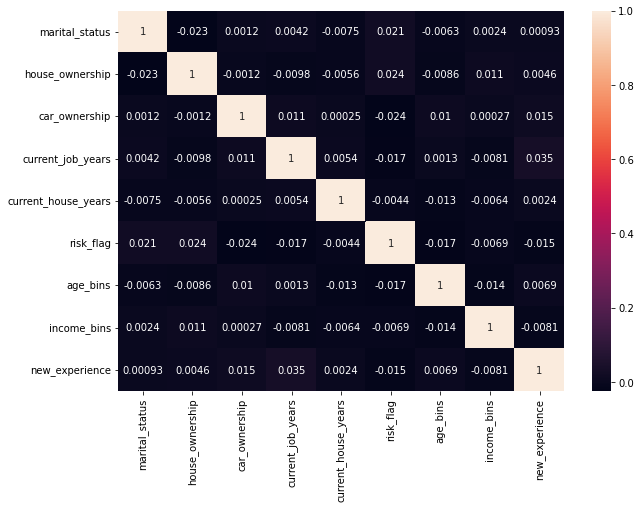

In [1368]:
plt.figure(figsize=(10,7))
corrmat = df.corr()
sns.heatmap(corrmat,annot=True,fmt='.2g');

- since none of the features are highly correlated with one another there is no need to drop any feature

### 6.One Hot Encoding

In [1369]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [1370]:
new_df = pd.get_dummies(df, columns = ['new_profession','new_state'],drop_first=True)

In [1410]:
new_df.head()

,marital_status,house_ownership,car_ownership,current_job_years,current_house_years,risk_flag,age_bins,income_bins,new_experience,new_profession_finance_and_law,new_profession_government,new_profession_healthcare,new_profession_others,new_profession_support,new_profession_technical,new_state_east,new_state_north,new_state_south,new_state_west
0,1,2,0,3,13,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,2,0,9,13,0,2,8,5,0,0,0,0,0,1,0,0,0,1
2,0,2,0,4,10,0,3,6,3,0,0,0,0,1,0,0,0,1,0
3,1,2,1,2,12,1,1,7,1,0,0,0,0,0,1,1,0,0,0
4,1,2,0,3,14,1,2,6,3,0,1,0,0,0,0,0,0,1,0


- we could do feature scaling on our dataset however since none of the featuers are so high that they can create an imbalance we will let it be.

#### Before we build a model one thing we need to see is that we have an imbalanced dataset

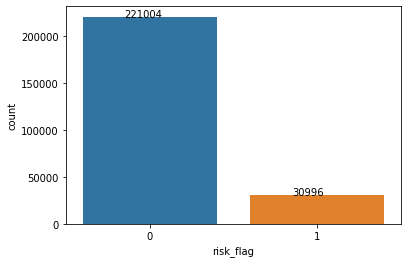

In [1411]:
ax = sns.countplot(new_df['risk_flag'])
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

- let us create our dependent and independent features

In [1373]:
X= new_df.drop('risk_flag',axis=1)
y= new_df['risk_flag']

In [1412]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [1374]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.2,random_state=0)

In [1375]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(201600, 18) (201600,)
(50400, 18) (50400,)


#### Sampling using RandomUnderSampling

In [1376]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X_train, y_train)

In [1377]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_rus)))

Original dataset shape Counter({0: 221004, 1: 30996})
Resampled dataset shape Counter({0: 24855, 1: 24855})


- function for all the performance metric

In [1378]:
def performance_metrics(feature):
  print('accuracy_Score\t:',metrics.accuracy_score(y_test,feature))
  print('roc_auc_score\t:',metrics.roc_auc_score(y_test,feature))
  print('recall\t\t:',metrics.recall_score(y_test,feature))
  print('precision\t:',metrics.precision_score(y_test,feature))
  print('f1 score\t:',metrics.f1_score(y_test,feature))

- function for roc_curve

In [1379]:
def roc_curve(feature):
  plt.figure(figsize=(8,6))
  false_pos_rate, true_pos_rate, thresholds = metrics.roc_curve(y_test, feature)

  auc = metrics.roc_auc_score(y_test, feature)
  plt.plot(false_pos_rate,true_pos_rate,linewidth=2, label="data 1, auc="+str(auc))
  plt.legend(loc=4)

  plt.plot([0,1], [0,1], 'k--' )
  plt.title('ROC curve for Predicting a credit card fraud detection')
  plt.xlabel('False Positive Rate (1 - Specificity)')
  plt.ylabel('True Positive Rate (Sensitivity)')

  plt.show()

- function for confusion matrix

In [1380]:
def confusion(feature):
  cm =  metrics.confusion_matrix(y_test,feature)
  sns.heatmap(cm,annot=True,cbar=False, fmt=".5g");

### Logistic Regression

In [1381]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_rus,y_rus)

LogisticRegression()

In [1382]:
y_pred = log_reg.predict(X_test)

In [1383]:
performance_metrics(y_pred)

accuracy_Score	: 0.5204761904761904
roc_auc_score	: 0.5353952225946101
recall		: 0.555121315746621
precision	: 0.13721070637955324
f1 score	: 0.22003485445039694


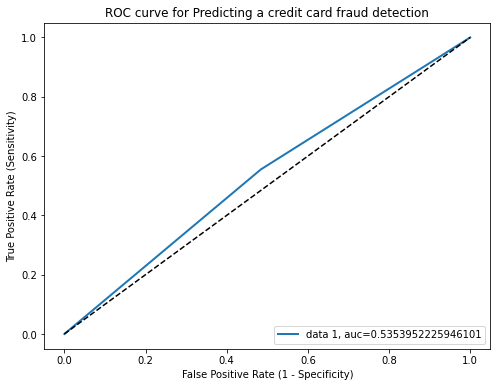

In [1384]:
roc_curve(y_pred)

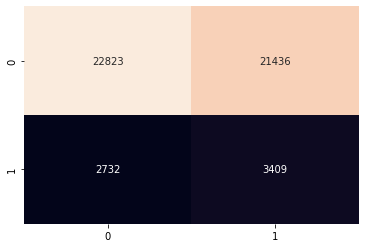

In [1385]:
confusion(y_pred)

### Naive Bayes

In [1386]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(x_rus,y_rus)

GaussianNB()

In [1387]:
y_pred2 = naive.predict(X_test)

In [1388]:
performance_metrics(y_pred2)

accuracy_Score	: 0.3923015873015873
roc_auc_score	: 0.538498982755425
recall		: 0.7318026380068393
precision	: 0.13424943988050783
f1 score	: 0.2268780290791599


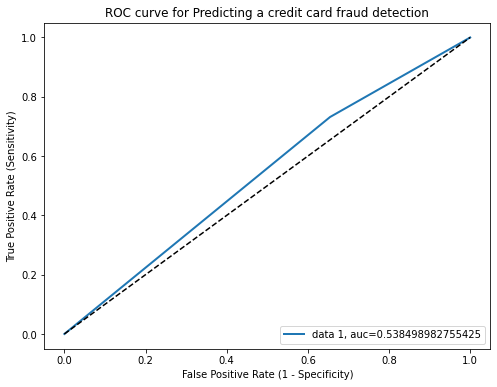

In [1389]:
roc_curve(y_pred2)

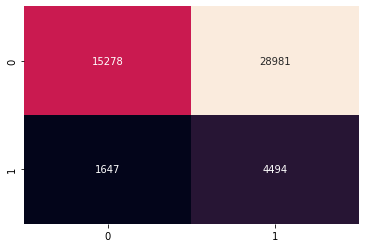

In [1390]:
confusion(y_pred2)

### Decision Tree

In [1391]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc.fit(x_rus,y_rus)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [1392]:
y_pred3 = dtc.predict(X_test)

In [1393]:
performance_metrics(y_pred3)

accuracy_Score	: 0.8451785714285714
roc_auc_score	: 0.8570123869937202
recall		: 0.8726591760299626
precision	: 0.432875605815832
f1 score	: 0.5786944549430376


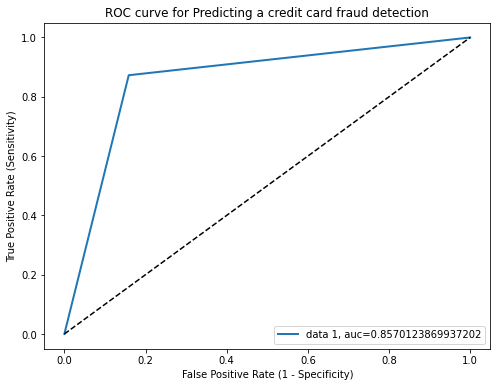

In [1394]:
roc_curve(y_pred3)

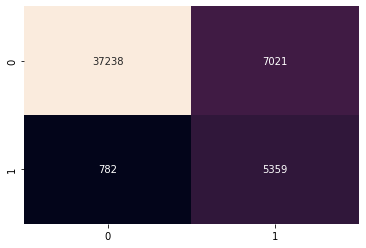

In [1395]:
confusion(y_pred3)

### K Nearest Neighbor

In [1396]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
knc.fit(x_rus,y_rus)

KNeighborsClassifier()

In [1397]:
y_pred4 = knc.predict(X_test)

In [1398]:
performance_metrics(y_pred4)

accuracy_Score	: 0.8243849206349206
roc_auc_score	: 0.8280630173414203
recall		: 0.8329262335124572
precision	: 0.3952859350850077
f1 score	: 0.5361354226717677


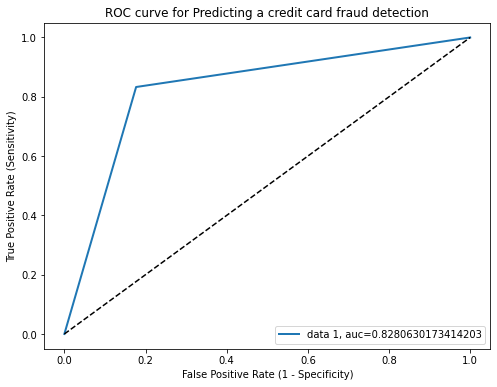

In [1399]:
roc_curve(y_pred4)

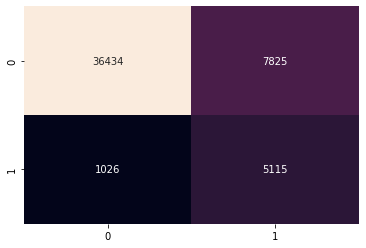

In [1400]:
confusion(y_pred4)

### Random Forest classifier

In [1401]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='gini',random_state=0)
rfc.fit(x_rus,y_rus)

RandomForestClassifier(n_estimators=10, random_state=0)

In [1402]:
y_pred5 = rfc.predict(X_test)

In [1403]:
performance_metrics(y_pred5)

accuracy_Score	: 0.8649801587301588
roc_auc_score	: 0.849213521115928
recall		: 0.8283667155186452
precision	: 0.46936704188964756
f1 score	: 0.5992107897991636


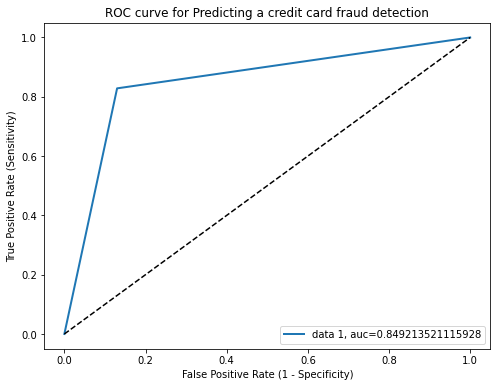

In [1404]:
roc_curve(y_pred5)

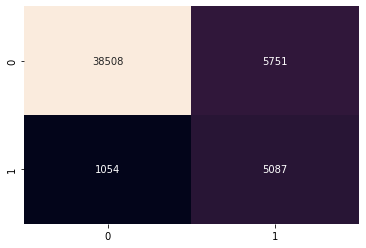

In [1405]:
confusion(y_pred5)

### Algorithm performance under Random under sampling

In [1406]:
data = [{'accuracy':0.520,'roc_auc_score':0.535,"recall":0.555,'precision':0.137,'f1 score':0.220},
        {'accuracy':0.392,'roc_auc_score':0.538,"recall":0.731,'precision':0.134,'f1 score':0.226},
        {'accuracy':0.845,'roc_auc_score':0.857,"recall":0.872,'precision':0.432,'f1 score':0.578},
        {'accuracy':0.824,'roc_auc_score':0.828,"recall":0.832,'precision':0.395,'f1 score':0.536},
        {'accuracy':0.864,'roc_auc_score':0.849,"recall":0.828,'precision':0.469,'f1 score':0.599}]
random_us = pd.DataFrame(data,index=['Logisticregression','NaiveBayes','DecisionTree','KNearestNeighbor','RandomForestClassifier'])
pd.options.display.float_format = '{:.3f}'.format
random_us

,accuracy,roc_auc_score,recall,precision,f1 score
Logisticregression,0.520,0.535,0.555,0.137,0.220
NaiveBayes,0.392,0.538,0.731,0.134,0.226
DecisionTree,0.845,0.857,0.872,0.432,0.578
KNearestNeighbor,0.824,0.828,0.832,0.395,0.536
RandomForestClassifier,0.864,0.849,0.828,0.469,0.599


- after doing test on over sampling and smote we found that undersampling gave the best results

- since we are dealing with loan defaulting and positive values takes more importance we will consider recall as our performance metric

### StratifiedKFold cross validation

Stratified K-Fold is an enhanced version of K-Fold cross-validation which is mainly used for imbalanced datasets. Just like K-fold, the whole dataset is divided into K-folds of equal size.

But in this technique, each fold will have the same ratio of instances of target variable as in the whole datasets.Which works very well with an imbalanced dataset

In [1413]:
from sklearn.model_selection import cross_val_score,StratifiedKFold

classifier=DecisionTreeClassifier()
stratifiedkf=StratifiedKFold(n_splits=10)

score=cross_val_score(classifier,X,y,cv=stratifiedkf)

print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.93924603 0.92492063 0.92571429 0.91376984 0.90083333 0.91698413
 0.88170635 0.89361111 0.8240873  0.64134921]
Average Cross Validation score :0.8762222222222222


### Hyperparameter tuning-GRIDSEARCH CV

In [1414]:
parameters = {"criterion" : ['entropy','gini'],
              "max_depth" : range(1,10),
              "min_samples_split":range(1,10),
              "min_samples_leaf":range(1,10)}

In [1416]:
from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(estimator = dtc,
                          param_grid = parameters,
                          cv=10,
                          verbose=1,
                          n_jobs=-1)
gridsearch.fit(x_rus,y_rus)

Fitting 10 folds for each of 1458 candidates, totalling 14580 fits


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [1417]:
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [1418]:
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=9, random_state=0)

In [1422]:
dt_classifier = DecisionTreeClassifier(criterion='gini',random_state=0,)
dt_classifier.fit(x_rus,y_rus)

DecisionTreeClassifier(random_state=0)

- let us predict on the new parameters

In [1423]:
predict_cv = dt_classifier.predict(X_test)
performance_metrics(predict_cv)

accuracy_Score	: 0.8447619047619047
roc_auc_score	: 0.8574062525521348
recall		: 0.8741247353851165
precision	: 0.4322409211691763
f1 score	: 0.578448275862069


Conclusion:
- if we take roc_curve as the performance metric - DecisionTree(undersampling) works the best
- if we take recall as the performance metric - DecisionTree(undersampling) works the best
- if we take precision as the performance metric - RandomForest(oversampling) works the best
- if we take f1_score as the performance metric -RandomForest(oversampling) works the best

### Different Algorithm performance under SMOTE transformation

In [1408]:
data = [{'accuracy':0.612,'roc_auc_score':0.521,"recall":0.402,'precision':0.134,'f1 score':0.201},
        {'accuracy':0.455,'roc_auc_score':0.529,"recall":0.627,'precision':0.132,'f1 score':0.219},
        {'accuracy':0.867,'roc_auc_score':0.850,"recall":0.827,'precision':0.475,'f1 score':0.603},
        {'accuracy':0.859,'roc_auc_score':0.851,"recall":0.840,'precision':0.458,'f1 score':0.593},
        {'accuracy':0.878,'roc_auc_score':0.845,"recall":0.800,'precision':0.500,'f1 score':0.616}]
smote = pd.DataFrame(data,index=['Logisticregression','NaiveBayes','DecisionTree','KNearestNeighbor','RandomForestClassifier'])
pd.options.display.float_format = '{:.3f}'.format
smote

,accuracy,roc_auc_score,recall,precision,f1 score
Logisticregression,0.612,0.521,0.402,0.134,0.201
NaiveBayes,0.455,0.529,0.627,0.132,0.219
DecisionTree,0.867,0.850,0.827,0.475,0.603
KNearestNeighbor,0.859,0.851,0.840,0.458,0.593
RandomForestClassifier,0.878,0.845,0.800,0.500,0.616


### Different Algorithm performance under Random over sampling

In [1409]:
data = [{'accuracy':0.522,'roc_auc_score':0.536,"recall":0.553,'precision':0.137,'f1 score':0.220},
        {'accuracy':0.406,'roc_auc_score':0.535,"recall":0.706,'precision':0.133,'f1 score':0.224},
        {'accuracy':0.876,'roc_auc_score':0.848,"recall":0.811,'precision':0.496,'f1 score':0.615},
        {'accuracy':0.860,'roc_auc_score':0.852,"recall":0.842,'precision':0.461,'f1 score':0.595},
        {'accuracy':0.885,'roc_auc_score':0.841,"recall":0.782,'precision':0.520,'f1 score':0.625}]
random_os = pd.DataFrame(data,index=['Logisticregression','NaiveBayes','DecisionTree','KNearestNeighbor','RandomForestClassifier'])
pd.options.display.float_format = '{:.3f}'.format
random_os

,accuracy,roc_auc_score,recall,precision,f1 score
Logisticregression,0.522,0.536,0.553,0.137,0.220
NaiveBayes,0.406,0.535,0.706,0.133,0.224
DecisionTree,0.876,0.848,0.811,0.496,0.615
KNearestNeighbor,0.860,0.852,0.842,0.461,0.595
RandomForestClassifier,0.885,0.841,0.782,0.520,0.625
